Part 1: Data Exploration and Preprocessing

1. Data Loading and Reviewing the structure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv("DMDW/adult/adult.csv")
print (df.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country   class  
0          2174             0              40   United-States   <=50

In [3]:
df.shape[1]

15

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


2. Data Cleaning

In [6]:
# Check for any missing values in each column
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

Looking at the dataset, the dataset doesn’t have any null values, but it contains missing values in the form of ‘?’ which needs to be preprocessed.

In [7]:
# Check for "?" values in each column
for column in df.columns:
    print(f'{column} - " ?" count:', (df[column] == ' ?').sum())

age - " ?" count: 0
workclass - " ?" count: 1836
fnlwgt - " ?" count: 0
education - " ?" count: 0
education-num - " ?" count: 0
marital-status - " ?" count: 0
occupation - " ?" count: 1843
relationship - " ?" count: 0
race - " ?" count: 0
sex - " ?" count: 0
capital-gain - " ?" count: 0
capital-loss - " ?" count: 0
hours-per-week - " ?" count: 0
native-country - " ?" count: 583
class - " ?" count: 0


In [8]:
# df.replace('?', pd.NA, inplace=True)
df.shape

(32561, 15)

In [9]:
# Replace '?' with NaN for easier handling of missing values
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)
df['native-country'] = df['native-country'].replace(' ?',np.nan)

In [10]:
# Drop rows with any missing values
df.dropna(how='any',inplace=True)

In [11]:
print (df.shape)
print (df.head(10))

(30162, 15)
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   

In [12]:
#Verify that there are no more missing values
print(df.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


Converting Categorical data into Numerical data

In [13]:
#Map 'sex' column to binary values: 1 for Male, 0 for Female
df['sex'] = df['sex'].map({' Male':1,' Female':0}).astype(int)

print (df.head(10))

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  sex  \
0           Never-married        Adm-clerical   Not-in-family   White    1   
1      Married-civ-spouse     Exec-managerial         Husband   White    1   
2                Divorced   Handlers-cleaners   Not-in-family

In [14]:
#Map 'class' column to binary values: 1 for <=50K, 0 for >50K
class_map={' <=50K':1,' >50K':0}
df['class']=df['class'].map(class_map).astype(int)
    
print (df.head(10))

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  sex  \
0           Never-married        Adm-clerical   Not-in-family   White    1   
1      Married-civ-spouse     Exec-managerial         Husband   White    1   
2                Divorced   Handlers-cleaners   Not-in-family

In [15]:
#Map 'native-country' values to group into 'US' and 'Non-US'
df['native-country'] = df['native-country'].apply(lambda x: 'US' if x == ' United-States' else 'Not-US')

In [16]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,US,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,US,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,US,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,US,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Not-US,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,US,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,Not-US,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,US,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0,14084,0,50,US,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178,0,40,US,0


In [17]:
#Map 'native-country' values to binary: 1 for US, 0 for Non-US
df['native-country'] = df['native-country'].map({'US':1,'Not-US':0}).astype(int)

In [18]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178,0,40,1,0


In [19]:
#Check unique values in the 'marital-status' column
print(df['marital-status'].unique())

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


In [20]:
#Map 'marital-status' values to broader categories: 'Single' and 'Married'
df['marital-status'] = df['marital-status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
df['marital-status'] = df['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Married')

In [21]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,0,0,0,40,0,1


In [22]:
#Map 'marital-status' values to binary: 0 for Married, 1 for Single
df['marital-status'] = df['marital-status'].map({'Married':0,'Single':1}).astype(int)
   
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,Wife,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,Wife,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,1,Other-service,Not-in-family,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,Husband,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,1,Prof-specialty,Not-in-family,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,0,Exec-managerial,Husband,White,1,5178,0,40,1,0


In [23]:
#Check unique values in the 'relationship' column
print(df['relationship'].unique())

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


In [24]:
#Map 'relationship' values to integer codes
relationship_map = {' Unmarried':0,' Wife':1,' Husband':2,' Not-in-family':3,' Own-child':4,' Other-relative':5}

df['relationship'] = df['relationship'].map(relationship_map)
    
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,1,Other-service,3,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,1,Prof-specialty,3,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,White,1,5178,0,40,1,0


In [25]:
#Check unique values in the 'race' column
print(df['race'].unique())

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


In [26]:
#Map 'race' values to integer codes
race_map={' White':0,' Black':1,' Other':2,' Amer-Indian-Eskimo':3,' Asian-Pac-Islander':4}


df['race']= df['race'].map(race_map)
    
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,1,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,1,0,0,0,40,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,1
6,49,Private,160187,9th,5,1,Other-service,3,1,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,0
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,0


In [27]:
#Define a mapping dictionary for 'workclass' 
workclass_mapping = {
    ' Federal-gov': 'govt',
    ' Local-gov': 'govt',
    ' State-gov': 'govt',
    ' Private': 'private',
    ' Self-emp-inc': 'self_employed',
    ' Self-emp-not-inc': 'self_employed'
}

# Use map function to apply the dictionary, defaulting to 'Not_employed' for values not in dictionary
df['workingClass_type'] = df['workclass'].map(workclass_mapping).fillna('Not_employed')

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,workingClass_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1,govt
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1,self_employed
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1,private
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,1,1,0,0,40,1,1,private
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,1,0,0,0,40,0,1,private
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,1,private
6,49,Private,160187,9th,5,1,Other-service,3,1,0,0,0,16,0,1,private
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,0,self_employed
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,0,private
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,0,private


In [28]:
#Map 'workingClass_type' categories to integer codes
workingclass_type_map = {'govt':0,'private':1,'self_employed':2,'Not_employed':3}

df['workingClass_type'] = df['workingClass_type'].map(workingclass_type_map)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,workingClass_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1,2
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,1,1,0,0,40,1,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,1,0,0,0,40,0,1,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,1,1
6,49,Private,160187,9th,5,1,Other-service,3,1,0,0,0,16,0,1,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,0,2
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,0,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,0,1


In [29]:
# Drop unnecessary columns and update DataFrame in place
df.drop(labels=['workclass', 'education', 'occupation'], axis=1, inplace=True)

# Display the first 10 rows
df.head(10)


,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,workingClass_type
0,39,77516,13,1,3,0,1,2174,0,40,1,1,0
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,1,1,0,0,40,1,1,1
4,28,338409,13,0,1,1,0,0,0,40,0,1,1
5,37,284582,14,0,1,0,0,0,0,40,1,1,1
6,49,160187,5,1,3,1,0,0,0,16,0,1,1
7,52,209642,9,0,2,0,1,0,0,45,1,0,2
8,31,45781,14,1,3,0,0,14084,0,50,1,0,1
9,42,159449,13,0,2,0,1,5178,0,40,1,0,1


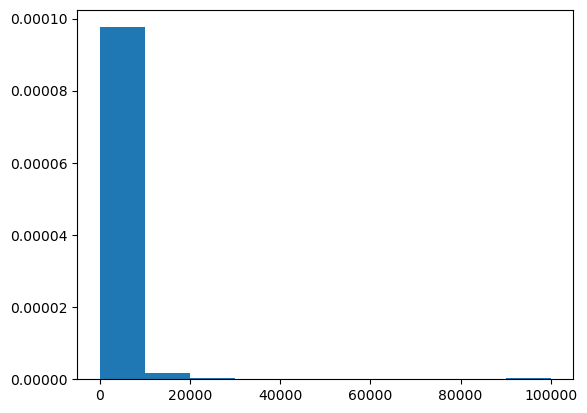

In [30]:
# Plot a histogram of 'capital-gain'
x=df['capital-gain']
plt.hist(x, bins=None, density=True) 
plt.show()

In [31]:
#Convert 'capital-gain' to binary: 1 if >0, else 0
df.loc[(df['capital-gain'] > 0),'capital-gain'] = 1
df.loc[(df['capital-gain'] == 0 ,'capital-gain')]= 0

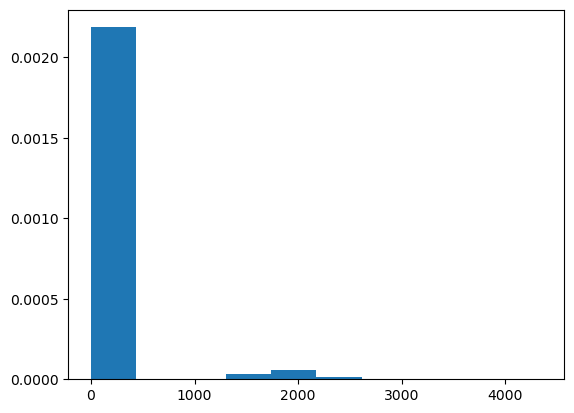

In [32]:
x=df['capital-loss']
plt.hist(x, bins=None, density=True) 
plt.show()

In [33]:
# Convert 'capital-loss' to binary: 1 if >0, else 0
df.loc[(df['capital-loss'] > 0),'capital-loss'] = 1
df.loc[(df['capital-loss'] == 0 ,'capital-loss')]= 0

df.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,workingClass_type
0,39,77516,13,1,3,0,1,1,0,40,1,1,0
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,1,1,0,0,40,1,1,1
4,28,338409,13,0,1,1,0,0,0,40,0,1,1
5,37,284582,14,0,1,0,0,0,0,40,1,1,1
6,49,160187,5,1,3,1,0,0,0,16,0,1,1
7,52,209642,9,0,2,0,1,0,0,45,1,0,2
8,31,45781,14,1,3,0,0,1,0,50,1,0,1
9,42,159449,13,0,2,0,1,1,0,40,1,0,1


In [34]:
#final information about the dataset after all preprocessing steps and conversion
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                30162 non-null  int64
 1   fnlwgt             30162 non-null  int64
 2   education-num      30162 non-null  int64
 3   marital-status     30162 non-null  int64
 4   relationship       30162 non-null  int64
 5   race               30162 non-null  int64
 6   sex                30162 non-null  int64
 7   capital-gain       30162 non-null  int64
 8   capital-loss       30162 non-null  int64
 9   hours-per-week     30162 non-null  int64
 10  native-country     30162 non-null  int64
 11  class              30162 non-null  int64
 12  workingClass_type  30162 non-null  int64
dtypes: int64(13)
memory usage: 3.2 MB
None


Part 2: Building and Evaluating the Model

3: Data Splitting

In [35]:
df.head(5)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,workingClass_type
0,39,77516,13,1,3,0,1,1,0,40,1,1,0
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,1,1,0,0,40,1,1,1
4,28,338409,13,0,1,1,0,0,0,40,0,1,1


In [36]:
# Separate features (X) and target variable (y)
X = df.drop('class', axis=1)
y = df['class']

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4: Model Training with Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with default parameters
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

5: Hyperparameter Tuning

In [39]:
# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

In [40]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [41]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


In [42]:
# Train the model with the best hyperparameters
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=300,
                       random_state=42)

6: Model Evaluation

In [43]:

# Make predictions on the test set
y_pred = rf_best.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8417039615448367
Precision: 0.8583838383838384
Recall: 0.9435931601154786
F1 Score: 0.8989738707288693


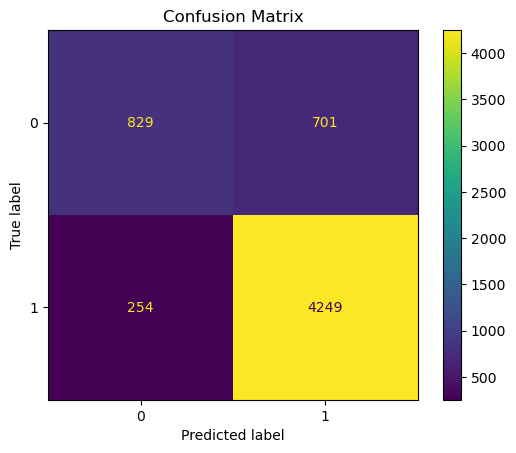

In [45]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

7: Feature Importance

In [46]:
# Extract feature importances and plot the top 10
feature_importances = rf_best.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()[-10:]  # Get indices of the top 10 features


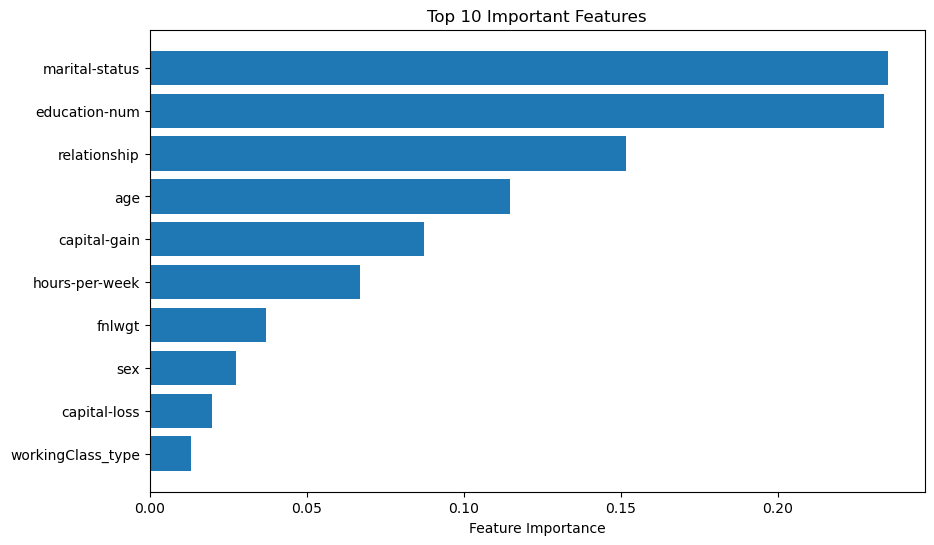

In [47]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features")
plt.show()

8: Insights

In [48]:
# Print the most important features
top_features = feature_names[sorted_idx]
print("Top 10 Features influencing income prediction:", top_features)

Top 10 Features influencing income prediction: Index(['workingClass_type', 'capital-loss', 'sex', 'fnlwgt', 'hours-per-week',
       'capital-gain', 'age', 'relationship', 'education-num',
       'marital-status'],
      dtype='object')


Summary of Findings and Insights: Marital Status and Education Level are the most important features for predicting income. Married people and those with more years of education are more likely to have higher incomes.
Relationship Status (like being a spouse or parent) and Age also influence income, with older individuals and those in certain family roles often earning more.
Capital Gain and Hours Worked per Week are important too, showing that having investment income and working more hours can increase income.
Other features like Gender, Capital Loss, and Type of Work add more predictive power by reflecting differences in demographics and job types.

Strengths:The model helps us see which factors impact income most.It works well with complex relationships between features, which is useful for understanding income differences.By using multiple decision trees, the model avoids overfitting, making it more accurate on new data.

Limitations:While we can see which features are important, it’s harder to interpret exactly how each decision is made within the model.
The model’s accuracy relies on having high-quality, complete data. Missing or inaccurate data could reduce its effectiveness.
If there are fewer high-income than low-income examples, the model might be biased toward predicting low income.